In [22]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import ipywidgets as widgets
import locale
import datetime as dt
from IPython.display import display
import panel as pn
pn.extension('tabulator')
import hvplot.pandas
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [23]:
# Carrega o dataset
df_dsa = pd.read_csv('dados/dataset.csv')

In [24]:
# Amostra dos dados
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


In [25]:
df_dsa.tail()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
9695,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-PA-10004569,Office Supplies,Paper,22.830
9696,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-AP-10000027,Office Supplies,Appliances,54.320
9697,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,TEC-PH-10000675,Technology,Phones,196.776
9698,CA-2017-105291,30/10/2017,SP-20920,Consumer,United States,San Luis Obispo,California,OFF-FA-10003059,Office Supplies,Fasteners,3.620
9699,CA-2018-147032,31/07/2018,LB-16795,Home Office,United States,Wilmington,Delaware,OFF-PA-10003256,Office Supplies,Paper,11.540


In [26]:
df_dsa.rename(
    columns={
        "ID_Pedido": "ID",
        "Data_Pedido": "Order_Date",
        "ID_Cliente": "Client_ID",
        "Segmento": "Segment",
        "Pais": "Country",
        "Cidade": "City",
        "Estado": "State",
        "ID_Produto": "Product_ID",
        "Categoria": "Category",
        "SubCategoria": "SubCategory",
        "Valor_Venda": "Sales_Value",
        "Ano": "Year",
        "Mes": "Month"
    },
    inplace=True
)

df_dsa.head()

,ID,Order_Date,Client_ID,Segment,Country,City,State,Product_ID,Category,SubCategory,Sales_Value
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


In [27]:
# Make DataFrame Pipeline Interactive
idf = df_dsa.interactive()

In [28]:
# list of states
unique_items = df_dsa["State"].value_counts()

num_unique_items = len(unique_items)
item_list = unique_items.index.tolist()

print("Number of unique items:", num_unique_items)
print("Unique items:", item_list)

Number of unique items: 49
Unique items: ['California', 'New York', 'Texas', 'Pennsylvania', 'Washington', 'Illinois', 'Ohio', 'Florida', 'Michigan', 'North Carolina', 'Arizona', 'Virginia', 'Tennessee', 'Colorado', 'Georgia', 'Kentucky', 'Indiana', 'Massachusetts', 'Oregon', 'New Jersey', 'Maryland', 'Wisconsin', 'Delaware', 'Minnesota', 'Connecticut', 'Missouri', 'Oklahoma', 'Alabama', 'Arkansas', 'Rhode Island', 'Mississippi', 'Utah', 'South Carolina', 'Louisiana', 'Nevada', 'Nebraska', 'New Mexico', 'Iowa', 'New Hampshire', 'Kansas', 'Idaho', 'Montana', 'South Dakota', 'District of Columbia', 'Vermont', 'Maine', 'North Dakota', 'West Virginia', 'Wyoming']


In [29]:
# New variable and data conversion
df_dsa['Order_Date'] = pd.to_datetime(df_dsa['Order_Date'], dayfirst = True)
df_dsa['Year'] = df_dsa['Order_Date'].dt.year

In [30]:
# list of years
unique_items1 = df_dsa["Year"].value_counts()

num_unique_items1 = len(unique_items1)
item_list1 = unique_items1.index.tolist()

print("Number of unique items:", num_unique_items1)
print("Unique items:", item_list1)

Number of unique items: 4
Unique items: [2018, 2017, 2016, 2015]


# Total sales by state

In [31]:
df_dsa_p3 = df_dsa.groupby('State')['Sales_Value'].sum().reset_index()

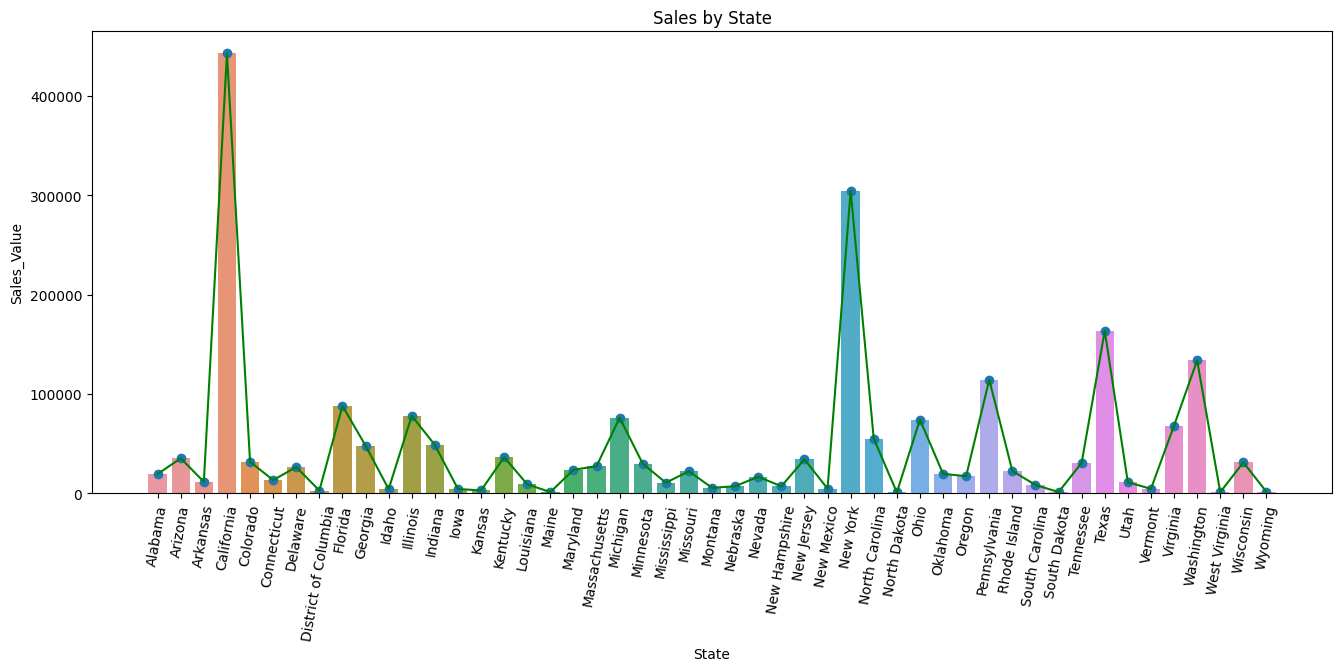

In [32]:
# Plot
y = df_dsa_p3['Sales_Value']

plt.figure(figsize=(16, 6))
sns.barplot(data=df_dsa_p3, y=y, x='State')
plt.title('Sales by State')
plt.xticks(rotation=80)

y2 = [i + 20 for i in y]
x = range(len(y))
plt.plot(x, y2, color='g')
plt.scatter(x, y2)
plt.show()


# What Are the 10 Cities with the Highest Total Sales?

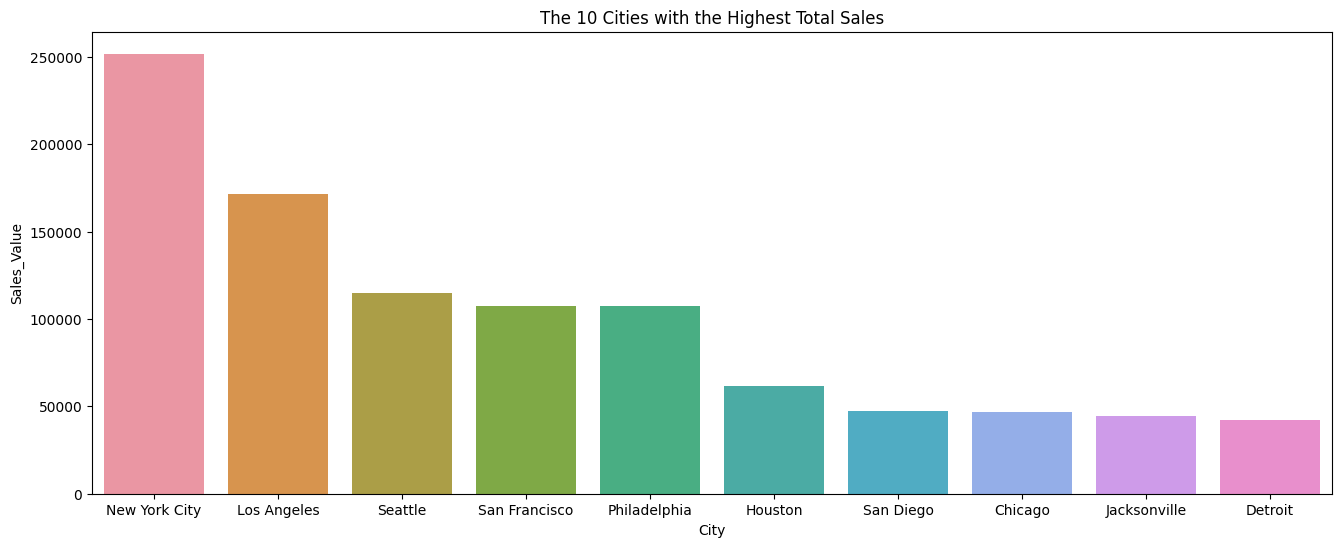

In [33]:
df_dsa_p4 = df_dsa.groupby('City')['Sales_Value'].sum().reset_index().sort_values(by = 'Sales_Value',
                                                                                    ascending = False).head(10)

# Plot
plt.figure(figsize = (16, 6))
sns.set_palette('coolwarm')
sns.barplot(data = df_dsa_p4, 
            y = 'Sales_Value', 
            x = 'City').set(title = 'The 10 Cities with the Highest Total Sales')
plt.show()

## Total sales by the Top 5 States

In [34]:
# top 5 states by sales
top5_states = df_dsa.groupby('State')['Sales_Value'].sum().reset_index().sort_values(by = 'Sales_Value',
                                                                                    ascending = False).head(5)
print("Top 5 States by Sales:", top5_states)

Top 5 States by Sales:            State  Sales_Value
3     California  442927.0975
30      New York  304536.4010
41         Texas  163549.8602
45    Washington  133826.0060
36  Pennsylvania  114411.6800


In [35]:
# Define Panel widgets
year_slider = pn.widgets.IntSlider(name='Year slider', start=2016, end=2018, step=1, value=2016)
year_slider

IntSlider(end=2018, name='Year slider', start=2016, value=2016)

In [36]:
states = ['California', 'New York', 'Texas', 'Washington', 'Pennsylvania']

sales_bystate = (
    idf[
        (idf.Year <= year_slider) &
        (idf.State.isin(states))
    ]
    .groupby(['State', 'Year'])['Sales_Value'].mean()
    .to_frame()
    .reset_index()
    .sort_values(by='Year')  
    .reset_index(drop=True)
)

In [37]:
sales = sales_bystate.hvplot(x='Year', by='State', line_width=2, title="Top 5 States Sales").opts(xlabel='Year', ylabel='Mean Sales Value (1 × 10^3)')
sales

# Which Segment Had the Highest Total Sales?

In [38]:
# Agrupamos por segmento e calculamos o total de vendas
df_dsa_p5 = df_dsa.groupby('Segment')['Sales_Value'].sum().reset_index().sort_values(by = 'Sales_Value',
                                                                                      ascending = False)

df_dsa_p5.head()

,Segment,Sales_Value
0,Consumer,1.133834e+06
1,Corporate,6.792322e+05
2,Home Office,4.224914e+05


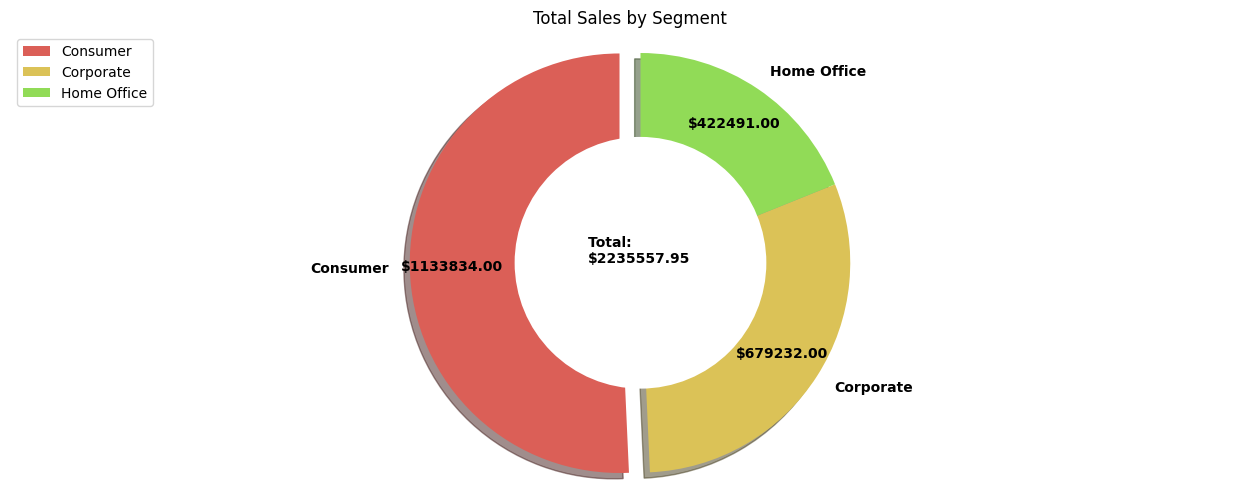

In [39]:
df_dsa_p5 = df_dsa.groupby('Segment')['Sales_Value'].sum().reset_index().sort_values(by='Sales_Value', ascending=False)

def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct * total / 100.0))
        return '${v:d}'.format(v=val)
    return my_format


def autopct_format(values):
    locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')  # Set the locale to your desired format

    def my_format(pct):
        total = sum(values)
        val = int(round(pct * total / 100.0))
        formatted_val = locale.currency(val)  # Format the value as currency
        return formatted_val

    return my_format

plt.figure(figsize=(16, 6))
plt.pie(df_dsa_p5['Sales_Value'],
        labels=df_dsa_p5['Segment'],
        autopct=autopct_format(df_dsa_p5['Sales_Value']),
        startangle=90,
        explode=(0.1, 0, 0),
        colors = sns.color_palette("hls", 8),
        shadow=True,
        pctdistance=0.8,
        labeldistance=1.1,
        textprops={'fontweight': 'bold'})
        

plt.title('Total Sales by Segment')
plt.axis('equal')
plt.legend(loc='upper left')

total_sales = sum(df_dsa_p5['Sales_Value'])
formatted_total_sales = round(total_sales, 2)
labels = plt.annotate('Total: \n${:.2f}'.format(total_sales), xy=(-0.25, 0), weight='bold')

centre_circle = plt.Circle((0, 0), 0.6, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.show()

## What is the Average Sales by Segment, by Year and by Month?

In [40]:
# Convertemos a coluna de data para o tipo datetime para obter o formato adequado
df_dsa['Order_Date'] = pd.to_datetime(df_dsa['Order_Date'], dayfirst = True)

In [41]:
# Extraímos o ano criando nova variável
df_dsa['Year'] = df_dsa['Order_Date'].dt.year

In [42]:
# Total de vendas por segmento e por ano
df_dsa_p6 = df_dsa.groupby(['Year', 'Segment'])['Sales_Value'].sum()

In [43]:
# Extraímos o mês e gravamos em uma nova variável
df_dsa['Month'] = df_dsa['Order_Date'].dt.month

In [44]:
# Convertemos a coluna de data para o tipo datetime para obter o formato adequado
df_dsa['Order_Date'] = pd.to_datetime(df_dsa['Order_Date'], dayfirst = True)
# Extraímos o ano criando nova variável
df_dsa['Year'] = df_dsa['Order_Date'].dt.year
# Extraímos o mês e gravamos em uma nova variável
df_dsa['Month'] = df_dsa['Order_Date'].dt.month
# Agrupamos por ano, mês e segmento e calculamos estatísticas de agregação
df_dsa1 = df_dsa.groupby(['Year', 'Month', 'Segment'])['Sales_Value'].agg([np.sum, np.mean, np.median])

df_dsa1

sum        mean  median
Year Month Segment                                    
2015 1     Consumer      6896.6290  146.736787  36.440
           Corporate     1701.5280  130.886769  51.940
           Home Office   5607.5500  329.855882  62.820
     2     Consumer      3167.8540  117.327926  22.776
           Corporate      623.1180   69.235333  62.310
...                            ...         ...     ...
2018 11    Corporate    44357.9862  341.215278  79.530
           Home Office  24009.3840  247.519423  56.560
     12    Consumer     48107.4558  183.616244  52.533
           Corporate    20524.4320  153.167403  46.460
           Home Office  13022.3910  224.523983  49.260

[144 rows x 3 columns]

In [45]:
# Vamos extrair os níveis
years = df_dsa1.index.get_level_values(0)
months = df_dsa1.index.get_level_values(1)
segments = df_dsa1.index.get_level_values(2)

In [46]:
# Plot by year

# Group the original dataframe by 'Ano', 'Mes', and 'Segmento' and calculate the desired descriptive statistics
df_dsa2 = df_dsa.groupby(['Year', 'Month', 'Segment'])['Sales_Value'].agg([np.sum, np.mean, np.median])

# Create a dictionary to store the dataframes for each year
dfs_by_year = {}

# Loop through the grouped dataframe and store each year's dataframe in the dictionary
for year, df_year in df_dsa2.groupby(level='Year'):
    dfs_by_year[year] = df_year.copy()

# Define the function for plotting
def plot_data(col):
    year_df = dfs_by_year[int(col)]
    
    if year_df is None:
        print(f"No data available for the year {col}")
        return
    
    plt.figure(figsize=(12, 6))
    sns.set()
    fig1 = sns.relplot(kind='line',
                       data=year_df, 
                       y='mean', 
                       x='Month',
                       hue='Segment',
                       col='Year',
                       col_wrap=4,
                       legend='brief')  # Adjust the legend spacing
    
    # Set the legend title and position
    plt.legend(title='Segment', loc='upper right')
    
    plt.title(f"Mean Sales Price for {col}")
    plt.xlabel('Month')
    plt.ylabel('Mean Sales Price')
    plt.show()

# Create the interact_manual widget
interact_manual_widget = widgets.interact_manual(plot_data, col=["2015", "2016", "2017", "2018"])

# Display the widget
display(interact_manual_widget)


interactive(children=(Dropdown(description='col', options=('2015', '2016', '2017', '2018'), value='2015'), But…

<function __main__.plot_data(col)>

## What is the Total Sales by Category and Sub-Category, Considering Only the Top 12 Sub-Categories?

In [47]:
# Group by category and subcategory and calculate sum for numeric variables only
df_dsa_p10 = df_dsa.groupby(['Category',
                             'SubCategory']).sum(numeric_only = True).sort_values('Sales_Value',
                                                                                   ascending = False).head(12)

In [48]:
# We convert the Value_Sale column into an integer and sort by category
df_dsa_p10 = df_dsa_p10[['Sales_Value']].astype(int).sort_values(by = 'Category').reset_index()

In [49]:
# Dataframe with categories and subcategories
df_dsa_p10

,Category,SubCategory,Sales_Value
0,Furniture,Chairs,317919
1,Furniture,Tables,202083
2,Furniture,Bookcases,108045
3,Furniture,Furnishings,88862
4,Office Supplies,Storage,216188
5,Office Supplies,Binders,194723
6,Office Supplies,Appliances,104061
7,Office Supplies,Paper,76312
8,Technology,Phones,325271
9,Technology,Machines,189238


In [50]:
# Dataframe with only the totals by category
df_dsa_p10_cat = df_dsa_p10.groupby('Category').sum(numeric_only = True).reset_index()

In [51]:
# Dataframe with categories 
df_dsa_p10_cat

,Category,Sales_Value
0,Furniture,716909
1,Office Supplies,591284
2,Technology,823548


In [52]:
# Color list for categories
colors_category = ['#5d00de',
                    '#0ee84f',
                    '#e80e27']

# Color list for subcategories
colors_subcategory = ['#aa8cd4',
                       '#aa8cd5',
                       '#aa8cd6',
                       '#aa8cd7',
                       '#26c957',
                       '#26c958',
                       '#26c959',
                       '#26c960',
                       '#e65e65',
                       '#e65e66',
                       '#e65e67',
                       '#e65e68']

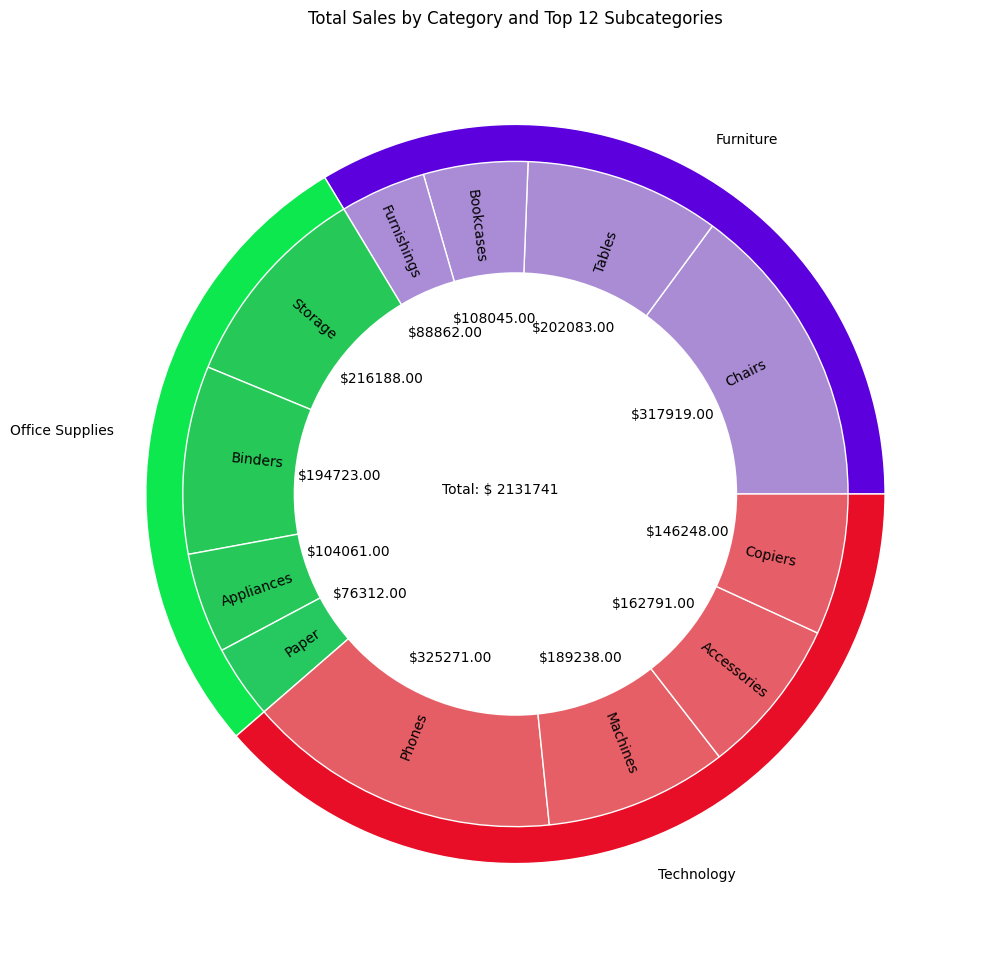

In [55]:
# Plot

# figure size
fig, ax = plt.subplots(figsize = (18,12))

# chart of categories
p1 = ax.pie(df_dsa_p10_cat['Sales_Value'], 
            radius = 1,
            labels = df_dsa_p10_cat['Category'],
            wedgeprops = dict(edgecolor = 'white'),
            colors = colors_category)

# chart of subcategories
p2 = ax.pie(df_dsa_p10['Sales_Value'],
            radius = 0.9,
            labels = df_dsa_p10['SubCategory'],
            autopct = autopct_format(df_dsa_p10['Sales_Value']),
            colors = colors_subcategory, 
            labeldistance = 0.7,
            wedgeprops = dict(edgecolor = 'white'), 
            pctdistance = 0.53,
            rotatelabels = True)

# donut
centre_circle = plt.Circle((0, 0), 0.6, fc = 'white')

# labels and annotations
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.annotate(text = 'Total: ' + '$ ' + str(int(sum(df_dsa_p10['Sales_Value']))), xy = (-0.2, 0))
plt.title('Total Sales by Category and Top 12 Subcategories')
plt.show()